## Ridge Regression

Ridge Regresyonu MSE: 0.2741402843704467


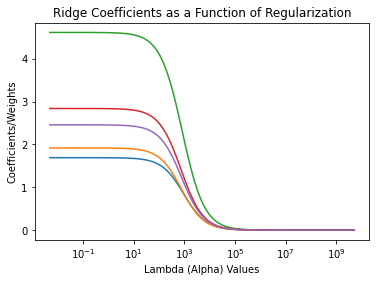

In [29]:
# Libraries used
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a random house price dataset
np.random.seed(42)
n_samples = 1000
n_features = 5

# Generate random specifications and prices
X = np.random.randn(n_samples, n_features)
true_coef = np.random.rand(n_features) * 10
y = X.dot(true_coef) + np.random.normal(scale=0.5, size=n_samples)

# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha parameter controls the amount of editing
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Regresyonu MSE:", ridge_mse)

#This code experiments with different levels of regularization by setting the Ridge regression model to various lambda (α) values
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coefs = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coefs.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, coefs) 
ax.set_xscale('log') 

plt.xlabel('Lambda (Alpha) Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

## Model Tuning

In [32]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [33]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [34]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [37]:
ridge_cv.fit(X_train, y_train)

C:\Users\MONSTER\emirturker\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [40]:
ridge_cv.alpha_
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

C:\Users\MONSTER\emirturker\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [41]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

0.5223563022383731

## Lasso Regression

In [42]:
lasso = Lasso(alpha=0.1)  # Alpha parameter controls the amount of editing
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Regresyonu MSE:", lasso_mse)

Lasso Regresyonu MSE: 0.3030334508437543


Text(0, 0.5, 'weights')

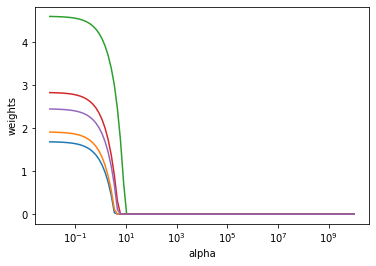

In [60]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
coefs = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Forecast

In [47]:
lasso_pred = lasso.predict(X_test)
y_pred = lasso.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, lasso_pred))

0.523403047891174

## Model Tuning

In [51]:
from sklearn.linear_model import LassoCV

In [52]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [53]:
lasso_cv_model.fit(X_train,y_train)

C:\Users\MONSTER\emirturker\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [55]:
lasso_cv_model.alpha_

0.00016884841654497793

In [56]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [57]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.00016884841654497793)

In [58]:
lasso_pred = lasso_tuned.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.523403047891174

## ElasticNet Regression

In [43]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Alpha determines the amount of editing, l1_ratio determines the L1 editing ratio
elasticnet.fit(X_train, y_train)
elasticnet_pred = elasticnet.predict(X_test)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)
print("ElasticNet Regresyonu MSE:", elasticnet_mse)


ElasticNet Regresyonu MSE: 0.391287548565887


In [61]:
elasticnet = ElasticNet().fit(X_train, y_train)

In [62]:
elasticnet.coef_

array([0.8717346 , 0.92549068, 2.79961975, 1.48600817, 1.29028781])

In [63]:
elasticnet.intercept_

0.026412562975468026

## Forecast

In [66]:
elasticnet.predict(X_test)

array([ -3.890873  ,   4.0257476 ,  -1.69080228,  -0.04393344,
         1.95941136,   0.13429515,  -2.6580402 ,   1.54491026,
        -4.41363463,  -2.70754714,   3.93927069,  -8.96721062,
        -3.22551773,  -1.82254383,   3.37927641,  -1.0067798 ,
         5.2835306 ,  -8.04194686,  -2.98532528,   4.57098811,
        -2.9209581 ,  -5.85713581,   0.79537941,   2.75135843,
         0.90780837,  -4.95339324,  -4.36539344,   4.32492058,
        -3.29849245,  -0.89865285,   0.03558023,  -2.30970426,
        -0.99584357,   1.30717511,   0.42128808,  -4.67935447,
        -3.77750337,  -0.43279847,   2.62753079,   3.13559457,
         0.43299162,  -6.14044177,  -5.20626302,   0.04468802,
         9.35235705,   4.93913581,   0.35094759,  -4.01881233,
        -0.4266582 ,  -0.191377  ,  -0.87424103,  -1.86849833,
         1.46988563,   1.30431376,  -0.34624365,  -0.61512147,
         0.94284844,   0.29665559,  -1.71943034,   3.01636544,
         4.84197121,   1.95913729,   0.5255745 ,   0.96

In [67]:
y_pred =elasticnet.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.748840420859469

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8042873087549661

## Model Tuning

In [72]:
from sklearn.linear_model import ElasticNetCV
elasticnet = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [74]:
elasticnet.alpha_

0.009605317638590535

In [75]:
elasticnet = ElasticNet(alpha = elasticnet.alpha_).fit(X_train,y_train)

In [76]:
y_pred = elasticnet.predict(X_test)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5221648990955399

In [79]:
# As a result
# Ridge Regression : 0.5223563022383731
# Lasso Regression : 0.523403047891174
# ElasticNet Regression : 0.5221648990955399
